<div style="text-align: right"><b> Ana Valentina López Chacón </b></div>
<div style="text-align: right"><b> Reconocimiento de Formas, 2024 - 2025 </b></div>

## **Clasificación de Animales: Transfer Learning**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import keras
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB0
from keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
keras.utils.set_random_seed(23)


Realizamos la lectura de los datos.

In [2]:
dataset_path = '/kaggle/input/animals10/raw-img'

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
num_clases = 10

train_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',
    shuffle=True,
    validation_split=0.2,
    subset='training',
    seed=123
)


test_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',
    shuffle=True,
    validation_split=0.2,
    subset='validation',
    seed=123
)

validation_split = 0.25  
num_validation_batches = int(validation_split * len(train_dataset)) #.file_paths
validation_dataset = train_dataset.take(num_validation_batches)
train_dataset = train_dataset.skip(num_validation_batches)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


### **EfficientNetB0**

In [3]:
inputs = keras.Input(shape=(224, 224, 3))
#x = keras.layers.Rescaling(scale = 1/255)(inputs)
base_M = EfficientNetB0(weights='imagenet', include_top=False)
base_M.trainable = False
x = base_M(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(units = 512, activation ='relu')(x)
x = keras.layers.Dropout(0.5)(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)
M = keras.models.Model(inputs=inputs, outputs=predictions)
opt = keras.optimizers.Adam(learning_rate=0.001)
M.compile(loss="SparseCategoricalCrossentropy", optimizer=opt, metrics=["SparseCategoricalAccuracy"])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
M.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,710,573 (17.97 MB)

 Trainable params: 661,002 (2.52 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [6]:
filename = 'Proyecto_tf_EfficientNetB0.keras'
checkpoint_cb = keras.callbacks.ModelCheckpoint(
 filepath=filename, monitor='val_SparseCategoricalAccuracy', save_best_only=True, verbose=1)
reduce_cb = keras.callbacks.ReduceLROnPlateau(
 monitor='val_SparseCategoricalAccuracy', factor=0.2585, patience=5, min_delta=0.0005, min_lr=1e-5)
early_cb = keras.callbacks.EarlyStopping(monitor='val_SparseCategoricalAccuracy', patience=5, min_delta=0.0005, mode='max')
#H = M.fit(x_train, y_train, batch_size=16, epochs=25, validation_data=(x_val, y_val), verbose=0,
 #callbacks=[checkpoint_cb, early_cb, reduce_cb])
H = M.fit(train_dataset, batch_size=128, epochs=100, validation_data=validation_dataset, verbose=0,
 callbacks=[checkpoint_cb, early_cb, reduce_cb])


Epoch 1: val_SparseCategoricalAccuracy improved from inf to 0.96837, saving model to Proyecto_tf_EfficientNetB0.keras

Epoch 2: val_SparseCategoricalAccuracy did not improve from 0.96837

Epoch 3: val_SparseCategoricalAccuracy did not improve from 0.96837

Epoch 4: val_SparseCategoricalAccuracy did not improve from 0.96837

Epoch 5: val_SparseCategoricalAccuracy did not improve from 0.96837

Epoch 6: val_SparseCategoricalAccuracy did not improve from 0.96837

Epoch 7: val_SparseCategoricalAccuracy did not improve from 0.96837

Epoch 8: val_SparseCategoricalAccuracy did not improve from 0.96837

Epoch 9: val_SparseCategoricalAccuracy did not improve from 0.96837

Epoch 10: val_SparseCategoricalAccuracy did not improve from 0.96837

Epoch 11: val_SparseCategoricalAccuracy did not improve from 0.96837

Epoch 12: val_SparseCategoricalAccuracy did not improve from 0.96837

Epoch 13: val_SparseCategoricalAccuracy did not improve from 0.96837

Epoch 14: val_SparseCategoricalAccuracy did not 

In [7]:
score = M.evaluate(test_dataset, verbose=0)
print(f'Loss: {score[0]:.4}\nPrecisión: {score[1]:.2%}')

Loss: 0.101
Precisión: 97.61%


Realizamos la gráfica para losses, accuracy, matriz de confusión y reporte de clasificación.

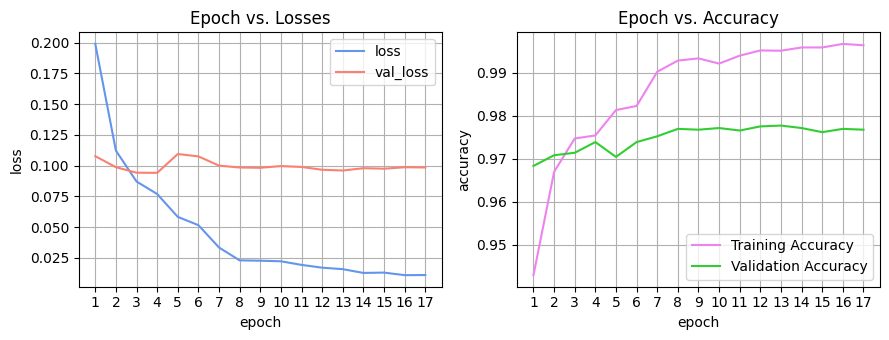

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))
xx = np.arange(1, len(H.history['loss'])+1)
ax = axes[0]
ax.grid()
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title("Epoch vs. Losses")
ax.set_xticks(xx)
ax.plot(xx, H.history['loss'], label = 'loss', color='cornflowerblue')
ax.plot(xx, H.history['val_loss'], label = 'val_loss', color='salmon')
ax.legend()

ax = axes[1]
ax.grid()
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_title("Epoch vs. Accuracy")
ax.set_xticks(xx)
ax.plot(xx, H.history['SparseCategoricalAccuracy'], label='Training Accuracy', color='violet')
ax.plot(xx, H.history['val_SparseCategoricalAccuracy'], label='Validation Accuracy', color = 'limegreen')
ax.legend()
plt.tight_layout()

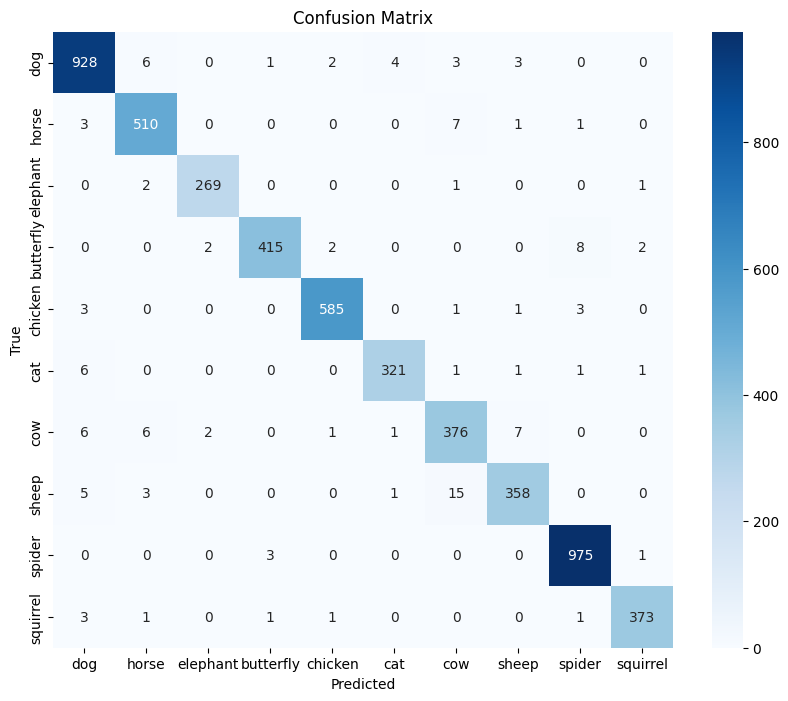

              precision    recall  f1-score   support

         dog       0.97      0.98      0.98       947
       horse       0.97      0.98      0.97       522
    elephant       0.99      0.99      0.99       273
   butterfly       0.99      0.97      0.98       429
     chicken       0.99      0.99      0.99       593
         cat       0.98      0.97      0.98       331
         cow       0.93      0.94      0.94       399
       sheep       0.96      0.94      0.95       382
      spider       0.99      1.00      0.99       979
    squirrel       0.99      0.98      0.98       380

    accuracy                           0.98      5235
   macro avg       0.98      0.97      0.97      5235
weighted avg       0.98      0.98      0.98      5235



In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def get_labels_and_predictions(dataset, model):
    true_labels = []
    predictions = []

    for images, labels in dataset:
        preds = model.predict(images, verbose = 0)
        predicted_classes = np.argmax(preds, axis=1)
        true_labels.extend(labels.numpy())
        predictions.extend(predicted_classes)

    return np.array(true_labels), np.array(predictions)

true_labels, predicted_labels = get_labels_and_predictions(test_dataset, M)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken",
              "gatto": "cat", "mucca": "cow", "pecora": "sheep", "ragno": "spider", "scoiattolo": "squirrel"}
class_names = [translate[i] for i in test_dataset.class_names]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(true_labels, predicted_labels, target_names = class_names))

### **ResNet50V2**

In [15]:
inputs = keras.Input(shape=(224, 224, 3))
x = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)(inputs)
base_M = ResNet50V2(weights='imagenet', include_top=False)
base_M.trainable = False
x = base_M(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(units = 512, activation ='relu')(x)
x = keras.layers.Dropout(0.5)(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)
M = keras.models.Model(inputs=inputs, outputs=predictions)
opt = keras.optimizers.Adam(learning_rate=0.001)
M.compile(loss="SparseCategoricalCrossentropy", optimizer=opt, metrics=["SparseCategoricalAccuracy"])

In [16]:
M.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,619,018 (93.91 MB)

 Trainable params: 1,054,218 (4.02 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [17]:
filename = 'Proyecto_tf_ResNet50V2.keras'
checkpoint_cb = keras.callbacks.ModelCheckpoint(
 filepath=filename, monitor='val_SparseCategoricalAccuracy', save_best_only=True, verbose=1)
reduce_cb = keras.callbacks.ReduceLROnPlateau(
 monitor='val_SparseCategoricalAccuracy', factor=0.2585, patience=5, min_delta=0.0005, min_lr=1e-5)
early_cb = keras.callbacks.EarlyStopping(monitor='val_SparseCategoricalAccuracy', patience=5, min_delta=0.0005, mode='max')
#H = M.fit(x_train, y_train, batch_size=16, epochs=25, validation_data=(x_val, y_val), verbose=0,
 #callbacks=[checkpoint_cb, early_cb, reduce_cb])
H = M.fit(train_dataset, batch_size=128, epochs=100, validation_data=validation_dataset, verbose=0,
 callbacks=[checkpoint_cb, early_cb, reduce_cb])


Epoch 1: val_SparseCategoricalAccuracy improved from inf to 0.95725, saving model to Proyecto_tf_ResNet50V2.keras

Epoch 2: val_SparseCategoricalAccuracy did not improve from 0.95725

Epoch 3: val_SparseCategoricalAccuracy did not improve from 0.95725

Epoch 4: val_SparseCategoricalAccuracy did not improve from 0.95725

Epoch 5: val_SparseCategoricalAccuracy did not improve from 0.95725

Epoch 6: val_SparseCategoricalAccuracy did not improve from 0.95725

Epoch 7: val_SparseCategoricalAccuracy did not improve from 0.95725

Epoch 8: val_SparseCategoricalAccuracy did not improve from 0.95725

Epoch 9: val_SparseCategoricalAccuracy did not improve from 0.95725

Epoch 10: val_SparseCategoricalAccuracy did not improve from 0.95725

Epoch 11: val_SparseCategoricalAccuracy did not improve from 0.95725

Epoch 12: val_SparseCategoricalAccuracy did not improve from 0.95725

Epoch 13: val_SparseCategoricalAccuracy did not improve from 0.95725

Epoch 14: val_SparseCategoricalAccuracy did not impr

In [18]:
score = M.evaluate(test_dataset, verbose=0)
print(f'Loss: {score[0]:.4}\nPrecisión: {score[1]:.2%}')

Loss: 0.1512
Precisión: 96.73%


Realizamos la gráfica para losses, accuracy, matriz de confusión y reporte de clasificación.

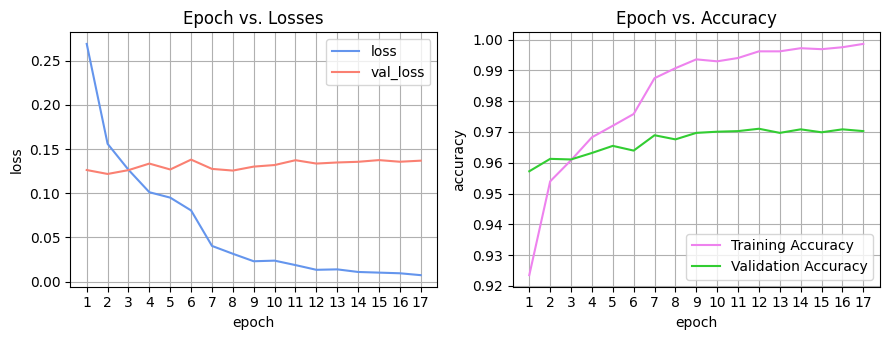

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))
xx = np.arange(1, len(H.history['loss'])+1)
ax = axes[0]
ax.grid()
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title("Epoch vs. Losses")
ax.set_xticks(xx)
ax.plot(xx, H.history['loss'], label = 'loss', color='cornflowerblue')
ax.plot(xx, H.history['val_loss'], label = 'val_loss', color='salmon')
ax.legend()

ax = axes[1]
ax.grid()
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_title("Epoch vs. Accuracy")
ax.set_xticks(xx)
ax.plot(xx, H.history['SparseCategoricalAccuracy'], label='Training Accuracy', color='violet')
ax.plot(xx, H.history['val_SparseCategoricalAccuracy'], label='Validation Accuracy', color = 'limegreen')
ax.legend()
plt.tight_layout()

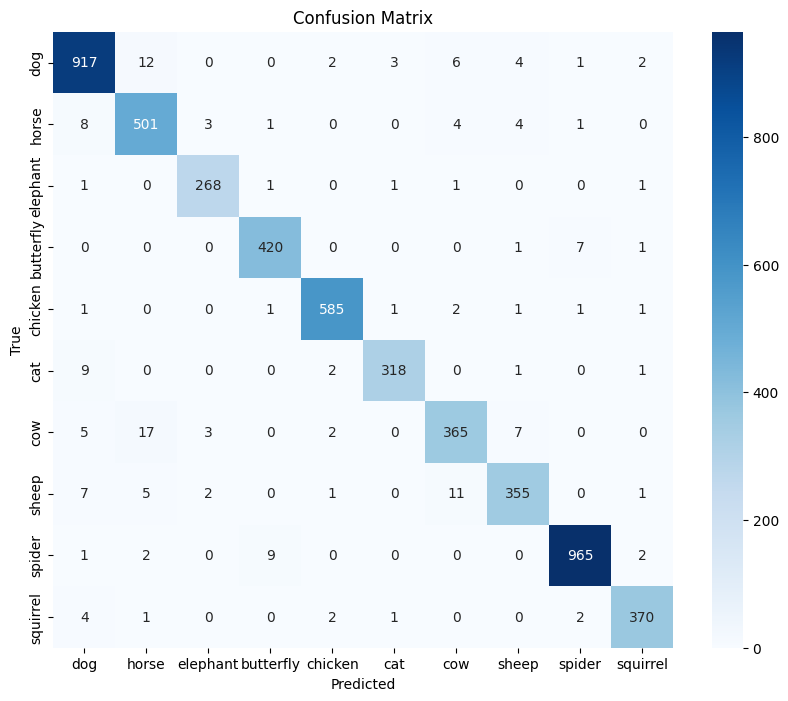

              precision    recall  f1-score   support

         dog       0.96      0.97      0.97       947
       horse       0.93      0.96      0.95       522
    elephant       0.97      0.98      0.98       273
   butterfly       0.97      0.98      0.98       429
     chicken       0.98      0.99      0.99       593
         cat       0.98      0.96      0.97       331
         cow       0.94      0.91      0.93       399
       sheep       0.95      0.93      0.94       382
      spider       0.99      0.99      0.99       979
    squirrel       0.98      0.97      0.97       380

    accuracy                           0.97      5235
   macro avg       0.97      0.96      0.96      5235
weighted avg       0.97      0.97      0.97      5235



In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def get_labels_and_predictions(dataset, model):
    true_labels = []
    predictions = []

    for images, labels in dataset:
        preds = model.predict(images, verbose = 0)
        predicted_classes = np.argmax(preds, axis=1)
        true_labels.extend(labels.numpy())
        predictions.extend(predicted_classes)

    return np.array(true_labels), np.array(predictions)

true_labels, predicted_labels = get_labels_and_predictions(test_dataset, M)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken",
              "gatto": "cat", "mucca": "cow", "pecora": "sheep", "ragno": "spider", "scoiattolo": "squirrel"}
class_names = [translate[i] for i in test_dataset.class_names]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(true_labels, predicted_labels, target_names = class_names))

## **Resumen de Resultados**

- Con el MLP sencillo obtenemos una precisión del 36.6%.
- Usando el Keras Tuner para la arquitectura de red obtenemos una precisión del 37.1%.
- Al realizar el ajuste del Learning rate y BatchSize obtenemos una precisión del 37.19%.
- Al incluir ReduceOnPlateau en los callbacks obtenemos una precisión del 41.47%.
- Con capas convolucionales y de pooling la precisión sube a un 67.47%, sin embargo se presenta mucho overfitting.
- Al hacer regularización se obtiene una precisión del 58.47%, con menos overfitting.
- La EfficientNetB0 encuentra un buen balance entre el número de capas (82), el número de conexiones y el tamaño del input, utiliza bloques residuales invertidos y permite una extracción de caracteristicas más eficiente con una arquitectura ligera, se obtiene una precisión de 97.61%.
- Empleando la ResNet50 se obtiene una precisión del 96.73%, a pesar de ser un modelo mucho más robusto que está dirigido a problemas más complejos da un resultado satisfactorio.